In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [3]:
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook
from bokeh.models import Legend

In [4]:
path = "C:/Users/kamalesh k b/Downloads/NSE-TATAGLOBAL.xlsx"
df = pd.read_excel(path)

In [5]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
1,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
3,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
4,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [6]:
df1 = df["Close"]

In [7]:
df1.head()

0    121.55
1    120.90
2    120.65
3    117.60
4    118.65
Name: Close, dtype: float64

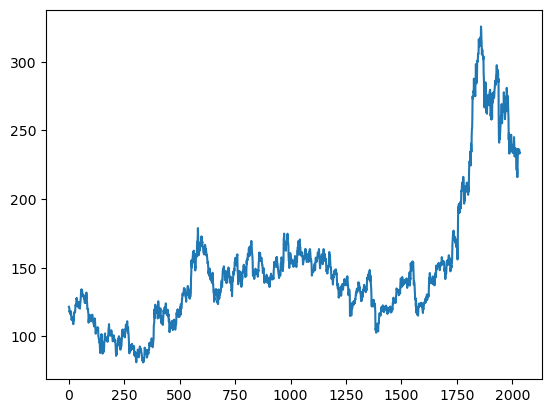

In [8]:
plt.plot(df1)

In [9]:
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

In [11]:
train_size = int(len(df1)*0.70)
test_size = len(df1)-train_size
train, test = df1[0:train_size,:],df1[train_size:len(df1),:1]
print(len(train), len(test))

1424 611


In [12]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+ time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
time_step = 100
x_train, y_train = create_dataset(train, time_step)
x_test, y_test = create_dataset(test, time_step)

In [14]:
x_train.shape

(1323, 100)

In [15]:
y_train.shape

(1323,)

In [16]:
x_test.shape

(510, 100)

In [17]:
y_test.shape

(510,)

In [18]:
y_test

array([0.25020425, 0.23999183, 0.22201797, 0.23080065, 0.22896242,
       0.24060458, 0.24080882, 0.23304739, 0.23325163, 0.23672386,
       0.25102124, 0.24387255, 0.25980392, 0.26879085, 0.22896242,
       0.23958333, 0.25081699, 0.24857026, 0.29554739, 0.28574346,
       0.2871732 , 0.28880719, 0.27328431, 0.29513889, 0.28308824,
       0.28982843, 0.30085784, 0.29166667, 0.29227941, 0.29861111,
       0.28206699, 0.26327614, 0.23202614, 0.24101307, 0.23876634,
       0.23549837, 0.22058824, 0.20588235, 0.1875    , 0.19219771,
       0.18995098, 0.16727941, 0.1815768 , 0.15400327, 0.14726307,
       0.16482843, 0.15379902, 0.15992647, 0.14174837, 0.14848856,
       0.1499183 , 0.13950163, 0.15339052, 0.16339869, 0.16748366,
       0.1752451 , 0.16727941, 0.16584967, 0.1744281 , 0.17340686,
       0.1689134 , 0.1752451 , 0.17544935, 0.17320261, 0.17320261,
       0.17075163, 0.17769608, 0.17708333, 0.17708333, 0.16462418,
       0.16605392, 0.15706699, 0.15482026, 0.14726307, 0.16176

In [19]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1], 1)

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
21/21 [==============================] - 20s 507ms/step - loss: 0.0092 - val_loss: 0.0180
Epoch 2/100
21/21 [==============================] - 8s 382ms/step - loss: 0.0018 - val_loss: 0.0040
Epoch 3/100
21/21 [==============================] - 9s 412ms/step - loss: 8.3451e-04 - val_loss: 0.0030
Epoch 4/100
21/21 [==============================] - 9s 420ms/step - loss: 8.4641e-04 - val_loss: 0.0033
Epoch 5/100
21/21 [==============================] - 9s 405ms/step - loss: 8.0359e-04 - val_loss: 0.0037
Epoch 6/100
21/21 [==============================] - 8s 393ms/step - loss: 7.5780e-04 - val_loss: 0.0033
Epoch 7/100
21/21 [==============================] - 8s 377ms/step - loss: 7.3453e-04 - val_loss: 0.0034
Epoch 8/100
21/21 [==============================] - 8s 376ms/step - loss: 7.2250e-04 - val_loss: 0.0038
Epoch 9/100
21/21 [==============================] - 8s 380ms/step - loss: 7.0164e-04 - val_loss: 0.0028
Epoch 10/100
21/21 [==============================] - 8s 381ms

In [23]:
import tensorflow as tf

In [24]:
tf.__version__

'2.12.0'

In [25]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

16/16 [==============================] - 1s 83ms/step


In [26]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [27]:
math.sqrt(mean_squared_error(y_train,train_predict))

131.89840187748925

In [28]:
math.sqrt(mean_squared_error(y_test,test_predict))

210.3700177675831

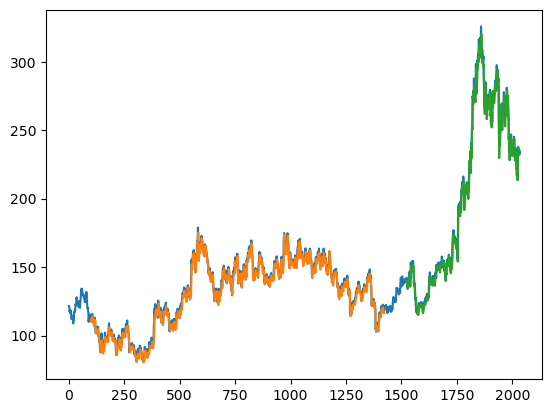

In [29]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [30]:
len(test)

611

In [31]:
x_input = test[511:].reshape(1,-1)
x_input.shape

(1, 100)

In [32]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [33]:
print(temp_input)

[0.8527369281045751, 0.8621323529411764, 0.8345588235294117, 0.84375, 0.7146650326797386, 0.6605392156862745, 0.6542075163398693, 0.6803513071895424, 0.6689133986928104, 0.6642156862745099, 0.678921568627451, 0.6913807189542482, 0.7089460784313726, 0.7226307189542485, 0.7340686274509802, 0.7212009803921569, 0.749795751633987, 0.7689950980392157, 0.7446895424836601, 0.7120098039215685, 0.7467320261437909, 0.7549019607843137, 0.7604166666666667, 0.7598039215686274, 0.7465277777777777, 0.7624591503267975, 0.7706290849673203, 0.8041258169934642, 0.7810457516339868, 0.7941176470588236, 0.7602124183006536, 0.7348856209150327, 0.7240604575163399, 0.7399918300653596, 0.749795751633987, 0.7614379084967322, 0.7542892156862746, 0.7475490196078431, 0.769607843137255, 0.7495915032679739, 0.8171977124183007, 0.8020833333333335, 0.7773692810457518, 0.7571486928104576, 0.7937091503267975, 0.7916666666666667, 0.7714460784313726, 0.7526552287581698, 0.7269199346405228, 0.6629901960784313, 0.681985294117

In [34]:
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.61051863]
101
1 day input [0.86213235 0.83455882 0.84375    0.71466503 0.66053922 0.65420752
 0.68035131 0.6689134  0.66421569 0.67892157 0.69138072 0.70894608
 0.72263072 0.73406863 0.72120098 0.74979575 0.7689951  0.74468954
 0.7120098  0.74673203 0.75490196 0.76041667 0.75980392 0.74652778
 0.76245915 0.77062908 0.80412582 0.78104575 0.79411765 0.76021242
 0.73488562 0.72406046 0.73999183 0.74979575 0.76143791 0.75428922
 0.74754902 0.76960784 0.7495915  0.81719771 0.80208333 0.77736928
 0.75714869 0.79370915 0.79166667 0.77144608 0.75265523 0.72691993
 0.6629902  0.68198529 0.64419935 0.62152778 0.6439951  0.66319444
 0.67544935 0.63705065 0.64603758 0.65890523 0.65870098 0.67790033
 0.63194444 0.63112745 0.62785948 0.64767157 0.63991013 0.63480392
 0.63868464 0.62336601 0.62745098 0.63970588 0.64705882 0.66196895
 0.67075163 0.65196078 0.63112745 0.61294935 0.6376634  0.62254902
 0.62745098 0.63337418 0.62642974 0.63623366 0.58312908 0.57781863
 0.57230392 0.58006536 0.57618464

In [35]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [36]:
len(df1)

2035

In [37]:
scaler.inverse_transform(lst_output)

array([[230.40496168],
       [228.14282694],
       [224.71800566],
       [221.44450989],
       [218.28926134],
       [215.05929117],
       [211.85513287],
       [208.79803944],
       [205.91749973],
       [203.21561489],
       [200.69906039],
       [198.36777058],
       [196.20951071],
       [194.20526843],
       [192.33382812],
       [190.57331023],
       [188.90220733],
       [187.30053673],
       [185.75086923],
       [184.23851147],
       [182.75188532],
       [181.28210473],
       [179.82293196],
       [178.37031064],
       [176.92196455],
       [175.4770401 ],
       [174.03559566],
       [172.59844103],
       [171.1666049 ],
       [169.74132752]])

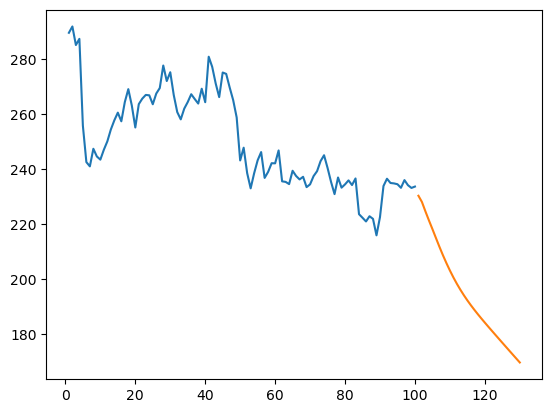

In [38]:
plt.plot(day_new,scaler.inverse_transform(df1[1935:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.savefig('30_days_predict.png')

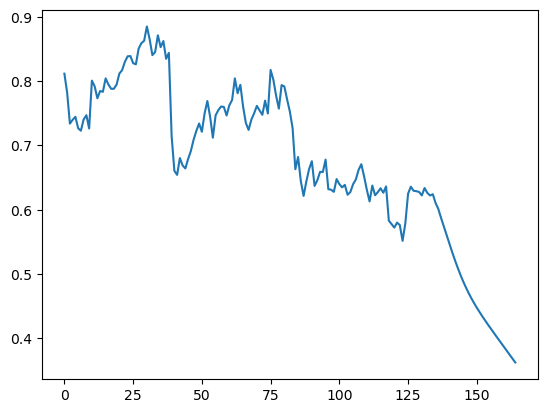

In [39]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1900:])

In [40]:
df3=scaler.inverse_transform(df3).tolist()

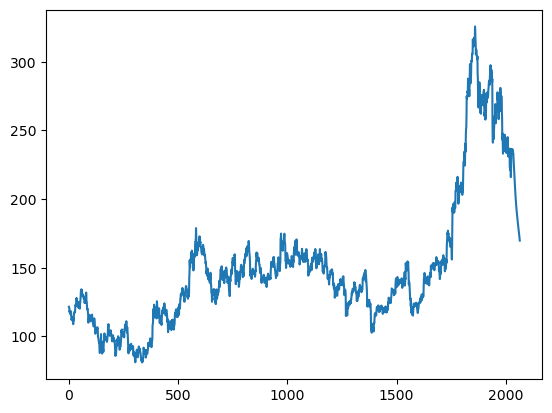

In [41]:
plt.plot(df3)